In [1]:
# Import necessary libraries
from sklearn.cluster import KMeans
import numpy as np

In [2]:
import sys
sys.path.append('../src')

# Try something to categorize the data problem

In [3]:
# Figure something out
# Call the DataLoader class
from data_loader import DataLoader

# Create a DataLoader object
data_loader = DataLoader()

# Load the data
data_loader.load_data(max_train_samples=200)

# View the first 5 rows of the data
data_loader.train_data[:200]

/Users/salimalkharsa/Desktop/Projects/LLM_adaptive_computation/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'question': ['Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?',
  'Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?',
  'Betty is saving money for a new wallet which costs $100. Betty has only half of the money she needs. Her parents decided to give her $15 for that purpose, and her grandparents twice as much as her parents. How much more money does Betty need to buy the wallet?',
  'Julie is reading a 120-page book. Yesterday, she was able to read 12 pages and today, she read twice as many pages as yesterday. If she wants to read half of the remaining pages tomorrow, how many pages should she read?',
  'James writes a 3-page letter to 2 different friends twice a week.  How many pages does he write a year?',
  'Mark has a garden with flowers. He planted plants of three different colors in it. Ten of them are yellow

In [4]:
# Transform the data into a dataframe for easy viewing
import pandas as pd

# Create a dataframe
df = pd.DataFrame(data_loader.train_data)
df.head()

,question,answer
0,Natalia sold clips to 48 of her friends in Apr...,How many clips did Natalia sell in May? ** Nat...
1,Weng earns $12 an hour for babysitting. Yester...,How much does Weng earn per minute? ** Weng ea...
2,Betty is saving money for a new wallet which c...,How much money does Betty have in the beginnin...
3,"Julie is reading a 120-page book. Yesterday, s...",How many pages did Maila read today? ** Maila ...
4,James writes a 3-page letter to 2 different fr...,How many pages does he write each week? ** He ...


In [5]:
# Let's see the embeddings of each sentence using sentence-transformers
from sentence_transformers import SentenceTransformer

# Load the model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Make sure everything is in string format within the data
data_loader.train_data = [str(i) for i in data_loader.train_data['question']]

# Get the embeddings
embeddings = model.encode(data_loader.train_data)

# Check the shape of the embeddings
embeddings.shape

# Check it with the dataframe
df = pd.DataFrame(embeddings)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.224403,-0.204828,-0.384135,0.114999,0.247111,0.278605,-0.238489,0.431188,-0.328097,0.584684,...,-1.012738,-1.580873,-1.249503,0.391411,0.140991,-0.075188,-0.140486,-0.071149,0.664550,-0.300144
1,-0.242447,0.233331,-1.188137,0.172667,0.780929,-0.145181,-0.334253,-0.051415,-0.341445,-0.236724,...,-0.359947,-0.600212,-1.256091,-0.101597,0.751326,-1.077337,-0.299089,-0.147491,1.102612,-0.013453
2,-0.697156,0.717760,-1.525538,-0.219449,0.555702,0.156345,-0.207559,0.623634,-0.012155,-0.669434,...,-1.146190,-0.741074,-0.447147,-0.478384,0.025889,-0.680112,-0.471818,-0.386386,0.400492,0.242425
3,-0.101004,-0.420556,-0.463006,0.076698,0.398848,-0.830072,0.210881,0.201428,-0.070745,-0.495970,...,-0.111545,-0.835725,-1.116908,0.039091,0.249617,-0.720291,-0.086058,0.340006,1.152893,-0.347941
4,-0.935601,0.202800,0.109137,0.039639,0.415698,0.097898,0.403755,0.004357,-0.344742,-0.362194,...,0.724881,-0.543531,-1.163470,0.038515,0.564476,-0.032620,-0.044933,0.203375,1.341785,-0.064258


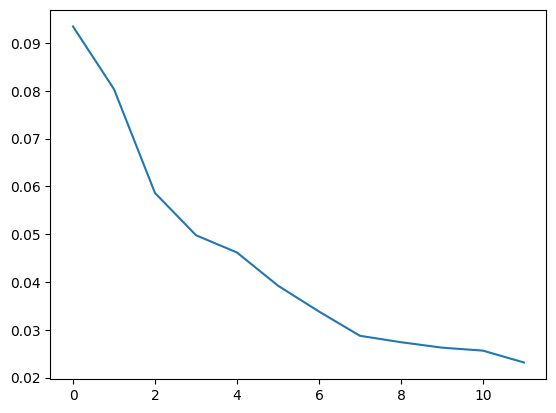

In [6]:
# Alright this is a ton of columns, let's reduce the number of columns using PCA
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=12)

# Fit the PCA object
pca.fit(df)

# Let's see the explained variance ratio via the graph
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

['Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?',
 'Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?',
 'Betty is saving money for a new wallet which costs $100. Betty has only half of the money she needs. Her parents decided to give her $15 for that purpose, and her grandparents twice as much as her parents. How much more money does Betty need to buy the wallet?',
 'Julie is reading a 120-page book. Yesterday, she was able to read 12 pages and today, she read twice as many pages as yesterday. If she wants to read half of the remaining pages tomorrow, how many pages should she read?',
 'James writes a 3-page letter to 2 different friends twice a week.  How many pages does he write a year?',
 'Mark has a garden with flowers. He planted plants of three different colors in it. Ten of them are yellow, and there are 80

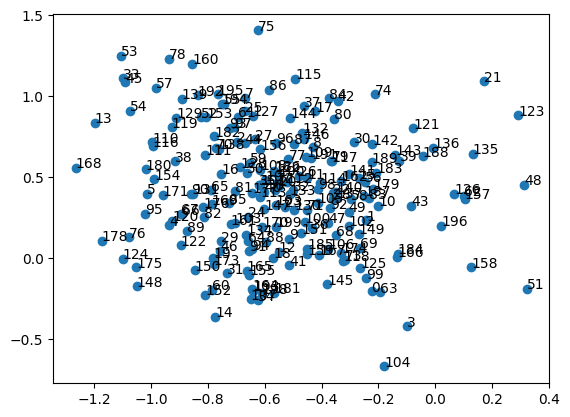

In [7]:
# Let's plot the first two components to see if we can see any clusters or patterns, in the graph label by the index
plt.scatter(df[0], df[1])
for i in range(len(df)):
    plt.text(df[0][i], df[1][i], str(i))

# Print the original dataframe
data_loader.train_data

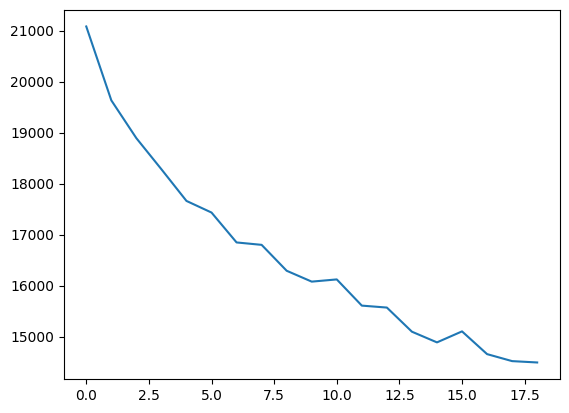

In [10]:
# Let's find the optimal number of clusters using the elbow method
# Create a list to store the inertia values
inertia = []

# Create a loop to find the inertia values
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(inertia)

In [13]:
# Eh not much that can be gained, let's try clustering the data using KMeans
# Create a KMeans object
kmeans = KMeans(n_clusters=18)

# Fit the KMeans object
kmeans.fit(df)

# Get the labels
labels = kmeans.labels_

# Let's see the labels for each input in data_loader.train_data, sort by the labels and tabulate each cluster
# Create a dataframe
clustered_df = pd.DataFrame({'data': data_loader.train_data, 'label': labels})
clustered_df = clustered_df.sort_values('label')
clustered_df.to_csv('clustered_data.csv')

In [14]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(df, labels)
print(silhouette)

0.029538801


Ok this was some exploratory work

Clustering word problems (or any type of textual data) involves grouping similar pieces of text based on their content, which typically requires a few steps to process and model the data effectively. Here’s a step-by-step outline of a typical approach for clustering word problems:

1. Preprocessing the Text
Before any clustering algorithm can be applied, the text data needs to be preprocessed:

Tokenization: Break the text into words or sentences. This helps in understanding the individual components of the problem.
Lowercasing: Convert all text to lowercase to ensure consistency.
Removing Stop Words: Common words like "the", "is", "a", etc., that don't carry significant meaning are typically removed.
Lemmatization/Stemming: Reduce words to their base form (e.g., "running" to "run").
Punctuation Removal: Depending on the problem, punctuation can be removed if it's not meaningful.
Handling Special Characters: Remove or replace numbers, special symbols, or other non-standard characters if they don't contribute to the semantic meaning of the problem.
2. Feature Extraction
Text needs to be converted into a numerical representation for clustering algorithms to work. This can be done in several ways:

TF-IDF (Term Frequency-Inverse Document Frequency): This represents each document (word problem) as a vector based on the frequency of words relative to their frequency in the entire dataset. It's useful for capturing the importance of words in each problem.
Word Embeddings: Using pre-trained word embeddings like Word2Vec, GloVe, or fastText can capture the semantic relationships between words. You can average the word embeddings for each word problem to generate a single vector representation for the entire problem.
Sentence Embeddings: A more advanced approach is to use sentence embeddings like BERT, RoBERTa, or Sentence-BERT to capture the meaning of the entire sentence (or word problem) in a vector form. These embeddings are more effective at understanding the semantic meaning of the entire problem rather than just individual words.
3. Dimensionality Reduction (Optional)
If the feature space is too large (e.g., using high-dimensional word embeddings), you may apply PCA (Principal Component Analysis) or t-SNE to reduce the dimensionality of the vectors while retaining the most important information. This can help improve clustering performance and reduce computational complexity.

4. Clustering
Once you have a numerical representation of each word problem, you can apply a clustering algorithm. Some popular methods are:

K-Means Clustering: A widely used clustering method that partitions the data into a predefined number of clusters, minimizing the sum of squared distances between data points and the cluster centroids. You can experiment with different values of K to find the best clustering.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm is useful if your data has clusters of varying shapes or densities. It doesn’t require specifying the number of clusters beforehand, and it can also handle noise (outliers).
Agglomerative Hierarchical Clustering: This method builds a hierarchy of clusters, starting with individual data points and merging the closest clusters iteratively. It’s useful if you want to visualize how clusters are formed.
Gaussian Mixture Models (GMM): This method models the data as a mixture of Gaussian distributions and is useful when you suspect the data follows a probabilistic distribution. It allows for clusters of different shapes and densities.
5. Model Evaluation
To evaluate the quality of your clusters, you can use several metrics:

Inertia: For K-Means clustering, inertia can help assess how compact the clusters are. It measures how well the data points fit within their assigned clusters.
Silhouette Score: This score gives insight into how well-separated and compact the clusters are. A score close to +1 indicates good clustering.
Manual Review: For domain-specific data like word problems, you may want to manually review a sample of the clustered word problems to ensure the clusters make intuitive sense.
Coherence: Especially for text clustering, checking the coherence of each cluster is key. This can involve checking if the problems within a cluster have similar mathematical themes or structures.
6. Post-Clustering Analysis
After clustering, it's essential to:

Label the Clusters: Based on the clusters' content, you can manually assign labels like "Basic Arithmetic", "Algebra", "Geometry", etc., if the goal is to categorize problems into different mathematical themes.
Visualize the Clusters: Use t-SNE or UMAP for dimensionality reduction and visualize the clusters in 2D or 3D space to see how well-separated they are.